In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('https://drive.google.com/uc?export=download&id=13ZdhWNmHO9y54Tb_SL99LH4DqOU8BdKx')
test = pd.read_csv('https://drive.google.com/uc?export=download&id=1AhaUoledLm07XbsreNRJIESsYz8gBr20')

In [ ]:
class Modify():
  def __init__(self):
    pass

  def fit(self, X):
    self.min = X.min(axis=0)
    self.max = X.max(axis=0)
    self.mean = X.mean(axis=0)
    self.err = 1e-8
    self.std = X.std(axis=0) + self.err
    self.range = self.max-self.min + self.err

  def norm(self, X):
    try:
      return (X-self.min)/self.range
    except Exception as error_type:
      print("Error: ", error_type)

  def z_score(self, X):
    try:
      return (X-self.mean)/self.std
    except Exception as error_type:
      print("Error: ", error_type)

In [ ]:
class Log_Reg():
    def __init__(self, lr=0.5, p=1000):
        self.lr = lr
        self.p = p

    def fit(self, X, Y):
        self.modify = Modify()
        X = np.array(X)
        self.modify.fit(X)
        X = self.modify.z_score(X)
        Y = np.array(Y).reshape(-1, 1)
        m, n = X.shape
        self.w = np.zeros(n).reshape(n, 1)
        self.b = 0
        P = np.linspace(0, self.p, self.p+1)
        L = []
        for u in range(self.p):
            z = X @ self.w + self.b
            z = z.reshape(-1, 1)
            y = 1 / (1 + np.exp(-z))

            loss = -np.mean(Y * np.log(y + self.modify.err) + (1 - Y) * np.log(1 - y + self.modify.err))
            L.append(loss)
            if (u>10) and (u%10==0):
              if (abs(L[u-10]-L[u])<0.001):
                print(f"Epoch: {u}")
                break

            dJ_dw = (1/m) * (X.T @ (y - Y))
            dJ_db = (1/m) * np.sum(y - Y)

            self.w -= self.lr * dJ_dw
            self.b -= self.lr * dJ_db
        plt.plot(P[:u+1], L)

    def predict(self, X):
        X = self.modify.z_score(np.array(X))
        z = X @ self.w + self.b
        y = 1 / (1 + np.exp(-z))
        return np.where(y > 0.5, 1, 0)

In [ ]:
#train.head(10)
Y_train = train['label']
X_train = train.drop('label', axis =1)

Epoch: 140


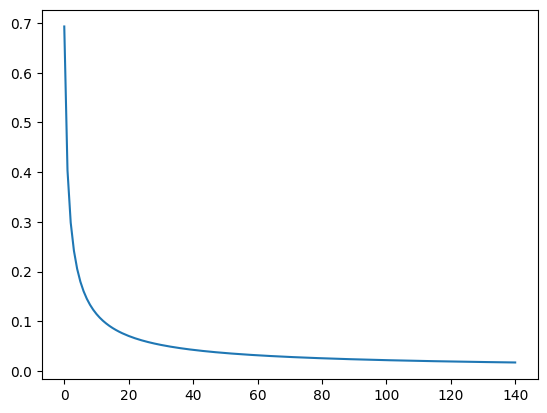

In [ ]:
model = Log_Reg()
model.fit(X_train, Y_train)

In [ ]:
#test.head(10)
Result = model.predict(test)

In [ ]:
print(np.unique(Result, return_counts=True))


(array([0, 1]), array([ 3275, 21725]))


In [ ]:
Analysis = pd.DataFrame({
    "Maximum" : X_train.max(axis= 0),
    "Minimum" : X_train.min(axis= 0),
    "Mean" : X_train.mean(axis= 0),
    "Std Deviation" : X_train.std(axis= 0),
    "Median" : X_train.median(axis= 0)
})

In [ ]:
Analysis.head(6)

,Maximum,Minimum,Mean,Std Deviation,Median
feature_0,930.857578,44.552292,500.646426,102.167451,500.723423
feature_1,0.541910,0.462030,0.499961,0.010176,0.499944
feature_2,9061.589352,966.650179,5001.475347,1018.686318,5000.138426
feature_3,332.284250,-130.775155,99.663713,50.946605,99.838686
feature_4,0.008894,0.000618,0.005001,0.001021,0.005002
feature_5,95723.410815,6888.787646,50004.809044,10193.068407,50049.357109
